# Single layer Neural Network

In this notebook, we will code a single neuron and use it as a linear classifier with two inputs. The tuning of the neuron parameters is done by backpropagation using gradient descent.

In [1]:
from sklearn.datasets import make_blobs
import numpy as np

# matplotlib to display the data
import matplotlib
matplotlib.rc('font', size=16)
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
from matplotlib import pyplot as plt, cm
from matplotlib.colors import ListedColormap
%matplotlib inline

## Dataset

Let's create some labeled data in the form of (X, y) with an associated class which can be 0 or 1. For this we can use the function `make_blobs` in the `sklearn.datasets` module. Here we use 2 centers with coordinates (-0.5, -1.0) and (1.0, 1.0).

In [5]:
X, y = make_blobs(n_features=2, random_state=42, centers=[(-.5,-1.),(1.,1.)])
y = y.reshape((y.shape[0], 1))
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


Plot our training data using `plt.scatter` to have a first visualization. Here we color the points with their labels stored in `y`.

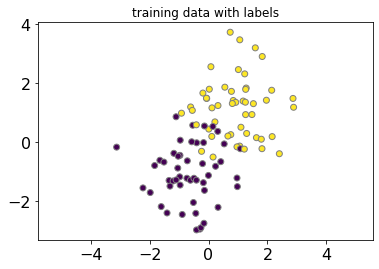

In [6]:
plt.scatter(X[:,0], X[:,1], c=y.squeeze(), edgecolors='gray')
plt.title('training data with labels')
plt.axis('equal')
plt.show()

## Activation functions

Here we play with popular activation functions like heaviside (step function), tanh, ReLu or sigmoid.

In [24]:
def heaviside(x):
    return np.heaviside(x, 0.5)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def ReLU(x):
    return np.maximum(x,0)

def leaky_ReLU(x, alpha=0.1):
    return np.maximum(x,alpha*x)

def tanh(x):
    return np.tanh(x)

Make a plot with all our activation functions

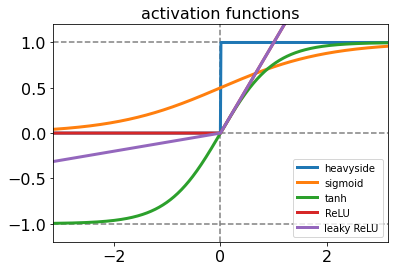

In [25]:
from math import pi

plt.figure()
x = np.arange(-pi, pi, 0.01)
plt.axhline(y=0., color='gray', linestyle='dashed')
plt.axhline(y=-1, color='gray', linestyle='dashed')
plt.axhline(y=1., color='gray', linestyle='dashed')
plt.axvline(x=0., color='gray', linestyle='dashed')

plt.xlim(-pi, pi)
plt.ylim(-1.2, 1.2)
plt.title('activation functions', fontsize=16)
plt.plot(x, heaviside(x), label='heavyside', linewidth=3)
plt.plot(x, sigmoid(x), label='sigmoid', linewidth=3)
plt.plot(x, tanh(x), label='tanh', linewidth=3)
plt.plot(x, ReLU(x), label='ReLU', linewidth=3)
plt.plot(x, leaky_ReLU(x), label='leaky ReLU', linewidth=3)
plt.legend(loc='lower right')
plt.show()

In [26]:
# gradients of the activation functions
def sigmoid_grad(x):
    s = sigmoid(x)
    return s*(1-s)

def relu_grad(x):
    return np.heaviside(x, 0.5) #1.*(x>0)

def tanh_grad(x):
    return 1-tanh(x)**2

Plot the gradients of the activation functions

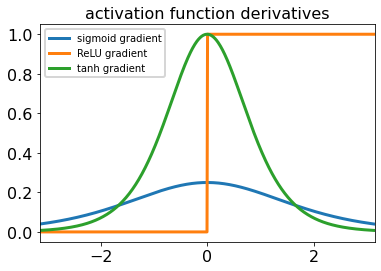

In [27]:
plt.figure()
x = np.arange(-pi, pi, 0.01)
plt.plot(x, sigmoid_grad(x), label='sigmoid gradient', linewidth=3)
plt.plot(x, relu_grad(x), label='ReLU gradient', linewidth=3)
plt.plot(x, tanh_grad(x), label='tanh gradient', linewidth=3)
plt.xlim(-pi, pi)
plt.title('activation function derivatives', fontsize=16)
legend = plt.legend()
legend.get_frame().set_linewidth(2)
plt.savefig('activation_functions_derivatives.pdf')
plt.show()

## ANN implementation

A simple neuron with two inputs $(x_1, x_2)$ which applies an affine transform of weigths $(w_1, w_2)$ and bias $w_0$.

The neuron compute the quantity called activation $a=\sum_i w_i x_i + w_0 = w_0 + w_1 x_1 + w_2 x_2$

This quantity is send to the activation function chosen to be a sigmoid function here: $f(a)=\dfrac{1}{1+e^{-a}}$

$f(a)$ is the output of the neuron bounded between 0 and 1.

### Quick implementation

First let's implement our network in a concise fashion.

In [30]:
import numpy as np
from numpy.random import randn

X, y = make_blobs(n_samples= 100, n_features=2, random_state=42, centers=[[-0.5, -1], [1, 1]])
# adjust the sizes of our arrays
X = np.c_[np.ones(np.shape(X)[0]),X]
y = y.reshape((np.shape(y)[0],1))

np.random.seed(2)
W = randn(3,1)
print('* model params: {}'.format(W.tolist()))
eta = 1e-2  # learning rate
n_epochs = 50

for t in range(n_epochs):
    # forward pass
    y_pred = sigmoid(X.dot(W))
    loss = np.average((y_pred-y)**2)
    print(t, loss)

    # backprop
    grad_y_pred = 2 * (y_pred-y)
    grad_W = np.dot(X.T, grad_y_pred * y_pred * (1-y_pred))

    # update rule
    W -= eta*grad_W
print('* new model params: {}'.format(W.tolist()))


* model params: [[-0.4167578474054706], [-0.056266827226329474], [-2.136196095668454]]
0 0.69888678007119
1 0.6810102729420158
2 0.6601234835808539
3 0.6352920474304009
4 0.605119315048916
5 0.5678141290825731
6 0.5217672528838464
7 0.46673241190142745
8 0.4042792006624582
9 0.3365215682518604
10 0.2670717521140393
11 0.20544252734780705
12 0.16198710182740403
13 0.13580478268635446
14 0.11983692035385701
15 0.10922630988132667
16 0.10160989587421129
17 0.09583058981012231
18 0.09126953943573383
19 0.08756534709365818
20 0.08449122187454204
21 0.08189655164236605
22 0.07967673714087983
23 0.0777564748980427
24 0.07607993124138909
25 0.07460467877966521
26 0.0732978000744355
27 0.07213329709562506
28 0.07109031799422666
29 0.07015191238011202
30 0.06930413810133321
31 0.06853540762296789
32 0.06783600131596645
33 0.0671976992958227
34 0.06661349894574377
35 0.06607739535904203
36 0.06558420865715363
37 0.06512944669754438
38 0.06470919482932122
39 0.0643200265563964
40 0.063958930532724

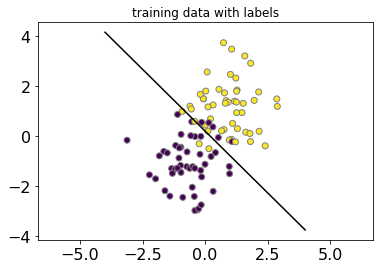

In [34]:
w0 = W[0,0]
w1 = W[1,0]
w2 = W[2,0]
plt.scatter(X[:,1], X[:,2], c=y.squeeze(), edgecolors='gray')
x1_lim = np.array([-4, 4])
x2_lim = -w0/w2 - w1/w2 * x1_lim
plt.plot(x1_lim, x2_lim, 'k') #frontiere entre les donnees a 0.5
plt.title('training data with labels')
plt.axis('equal')
plt.show()

### Modular implementation

Now let's create a class to represent our neural network to have more flexibility and modularity. This will prove to be useful later when we add more layers.

In [36]:
class SingleLayerNeuralNetwork:
    """A simple artificial neuron with a single layer and two inputs. 
    
    This type of network is called a Single Layer Neural Network and belongs to 
    the Feed-Forward Neural Networks. Here, the activation function is a sigmoid, 
    the loss is computed using the squared error between the target and 
    the prediction. Learning the parameters is achieved using back-propagation 
    and gradient descent
    """
    
    def __init__(self, eta=0.01, rand_seed=42):
        """Initialisation routine."""
        np.random.seed(rand_seed)
        self.W = randn(3,1)  # weigths
        self.eta = eta  # learning rate
        self.loss_history = []
    
    def sigmoid(self, x):
        """Our activation function."""
        return 1/(1+np.exp(-x))
    
    def sigmoid_grad(self, x):
        """Gradient of the sigmoid function."""
        s = self.sigmoid(x)
        return s*(1-s)
    
    def predict(self, X, bias_trick=True):
        X = np.atleast_2d(X)
        if bias_trick:
            # bias trick: add a column of 1 to X
            X = np.c_[np.ones((X.shape[0])), X]
        return self.sigmoid(X.dot(self.W))
    
    def loss(self, X, y, bias_trick=False):
        """Compute the squared error loss for a given set of inputs."""
        y_pred = self.predict(X, bias_trick=bias_trick)
        y_pred = y_pred.reshape((y_pred.shape[0], 1))
        loss = np.average((y_pred-y)**2)
        return loss
        
    def back_propagation(self, X, y):
        """Conduct backpropagation to update the weights."""
        X = np.atleast_2d(X)
        y_pred = self.sigmoid(np.dot(X, self.W)).reshape((X.shape[0], 1))
        grad_y_pred = 2*(y_pred-y)
        grad_W = np.dot(X.T,grad_y_pred*y_pred*(1-y_pred))

        # update weights
        self.W -= eta*grad_W
        
    def fit(self, X, y, n_epochs=10, method='batch', save_fig=False):
        """Perform gradient descent on a given number of epochs to update the weights."""
        # bias trick: add a column of 1 to X
        X = np.c_[np.ones((X.shape[0])), X]
        self.loss_history.append(self.loss(X, y))  # initial loss
        for i_epoch in range(n_epochs):
            if method == 'batch':
                # perform backprop on the whole training set (batch)
                self.back_propagation(X, y)
                # weights were updated, compute the loss
                loss = self.loss(X, y)
                self.loss_history.append(loss)
                print(i_epoch, self.loss_history[-1])
            else:
                # here we update the weight for every data point (SGD)
                for (xi, yi) in zip(X, y):
                    self.back_propagation(xi, yi)
                    # weights were updated, compute the loss
                    loss = self.loss(X, y)
                    self.loss_history.append(loss)
            if save_fig:
                self.plot_model(i_epoch, save=True, display=False)

    def decision_boundary(self, x):
        """Return the decision boundary in 2D."""
        w0=self.W[0]
        w1=self.W[1]
        w2=self.W[2]
        return -w0/w2-w1/w2*x
    
    def plot_model(self, i_epoch=-1, save=False, display=True):
        """Build a figure to vizualise how the model perform."""
        xx0, xx1 = np.arange(-3, 3.1, 0.1), np.arange(-3, 4.1, 0.1)
        XX0, XX1 = np.meshgrid(xx0, xx1)
        # apply the model to the grid
        y_an = np.empty(len(XX0.ravel()))
        i = 0
        for (x0, x1) in zip(XX0.ravel(), XX1.ravel()):
            y_an[i] = self.predict(np.array([x0, x1]))
            i += 1
        y_an = y_an.reshape((len(xx1), len(xx0)))
        figure = plt.figure(figsize=(12, 4))
        ax1 = plt.subplot(1, 3, 1)
        #ax1.set_title(r'$w_0=%.3f$, $w_1=%.3f$, $w_2=%.3f$' % (self.W[0], self.W[1], self.W[2]))
        ax1.set_title("current prediction")
        ax1.contourf(XX0, XX1, y_an, alpha=.5)
        ax1.scatter(X[:, 0], X[:, 1], c=y.squeeze(), edgecolors='gray')
        ax1.set_xlim(-3, 3)
        ax1.set_ylim(-3, 4)
        print(ax1.get_xlim())
        x = np.array(ax1.get_xlim())
        ax1.plot(x, self.decision_boundary(x), 'k-', linewidth=2)
        ax2 = plt.subplot(1, 3, 2)
        x = np.arange(3)  # the label locations
        rects1 = ax2.bar(x, [self.W[0, 0], self.W[1, 0], self.W[2, 0]])
        ax2.set_title('model parameters')
        ax2.set_xticks(x)
        ax2.set_xticklabels([r'$w_0$', r'$w_1$', r'$w_2$'])
        ax2.set_ylim(-1, 2)
        ax2.set_yticks([0, 2])
        ax2.axhline(xmin=0, xmax=2)
        ax3 = plt.subplot(1, 3, 3)
        ax3.plot(self.loss_history, c='lightgray', lw=2)
        if i_epoch < 0:
            i_epoch = len(self.loss_history) - 1
        ax3.plot(i_epoch, self.loss_history[i_epoch], 'o')
        ax3.set_title('loss evolution')
        ax3.set_yticks([])
        plt.subplots_adjust(left=0.05, right=0.98)
        if save:
            plt.savefig('an_%02d.png' % i_epoch)
        if display:
            plt.show()
        plt.close()


### Train our model on the data set

Create two blobs with $n=1000$ data points.

Instantiate the model with $\eta$=0.1 and a random seed of 2.

Train the model using the batch gradient descent on 20 epochs.

In [44]:
X, y = make_blobs(n_samples=10000, n_features=2, random_state=42, centers=[[-0.5, -1], [1, 1]])
y = y.reshape((y.shape[0], 1))

an1 = SingleLayerNeuralNetwork(eta=.1)
print('* init model params: {}'.format(an1.W.tolist()))
print(an1.loss(X, y, bias_trick=True))
an1.fit(X, y, n_epochs=20, method='batch', save_fig=False)
print('* new model params: {}'.format(an1.W.tolist()))

* init model params: [[0.4967141530112327], [-0.13826430117118466], [0.6476885381006925]]
0.17519073699720794
0 0.10067403523637827
1 0.09977435983458413
2 0.09904796651527101
3 0.09840836849920107
4 0.0978379370133892
5 0.0973566238066438
6 0.09695707366779316
7 0.09661738413269441
8 0.0963214596858874
9 0.09605867919277375
10 0.09582136659903547
11 0.09560395704531627
12 0.09540333605148704
13 0.09521900378403415
14 0.0950518287266498
15 0.09490201700778976
16 0.0947681211245721
17 0.0946475466250994
18 0.09453749504623922
19 0.09443554135183438
* new model params: [[-3.2051104011526594], [10.29233836195389], [12.719978845001469]]


Now we have trained our model, plot the results

(-3.0, 3.0)


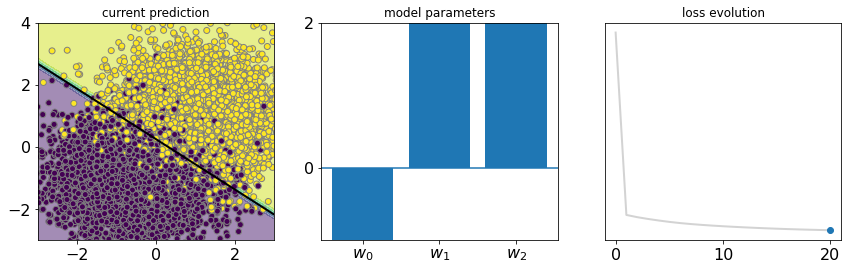

In [45]:
an1.plot_model()

Now try to train another network using SGD. Use only 1 epoch since with SGD, we are updating the weights with every training point (so $n$ times per epoch).

In [46]:
an2 = SingleLayerNeuralNetwork(eta=0.1, rand_seed=2)
print('* init model params: {}'.format(an2.W.tolist()))
an2.fit(X, y, n_epochs=1, method='SGD', save_fig=False)
print('* new model params: {}'.format(an2.W.tolist()))

* init model params: [[-0.4167578474054706], [-0.056266827226329474], [-2.136196095668454]]
* new model params: [[-0.3089337810149369], [1.2172382480136865], [1.6614794435241786]]


plot the difference in terms of loss evolution using batch or stochastic gradient descent

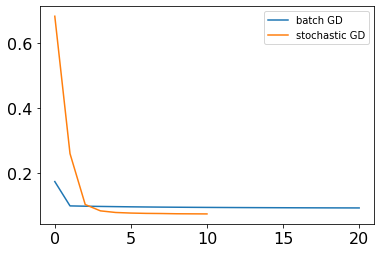

In [50]:
plt.plot(an1.loss_history[:], label='batch GD')
plt.plot(an2.loss_history[0::1000], label='stochastic GD')
#plt.ylim(0, 2000)
plt.legend()
plt.show()

(-3.0, 3.0)


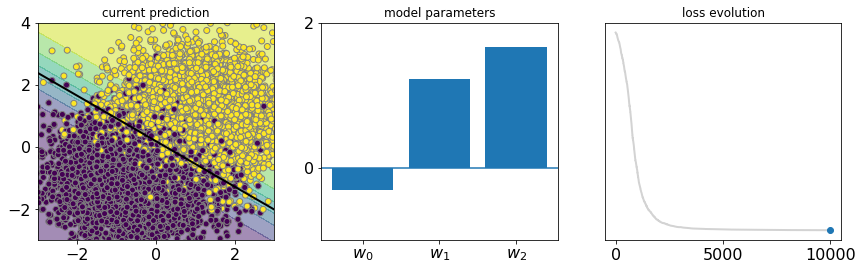

In [51]:
an2.plot_model()

## Logistic regression

Our single layer network using the logistic function for activation is very similar to the logistic regression we saw in a previous tutorial. We can easily compare our result with the logistic regression using `sklearn` toolbox.

In [52]:
from sklearn.linear_model import LogisticRegression

X, y = make_blobs(n_samples=1000, n_features=2, random_state=42, centers=[[-0.5, -1], [1, 1]])
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)
print(log_reg.coef_)
print(log_reg.intercept_)

[[1.5698506  1.81179711]]
[-0.50179977]


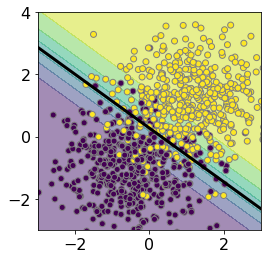

In [53]:
x0, x1 = np.meshgrid(
        np.linspace(-3, 3.1, 62).reshape(-1, 1),
        np.linspace(-3, 4.1, 72).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

plt.figure(figsize=(4, 4))
contour = plt.contourf(x0, x1, zz, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='gray')

# decision boundary
x_bounds = np.array([-3, 3])
boundary = -(log_reg.coef_[0][0] * x_bounds + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(x_bounds, boundary, "k-", linewidth=3)

plt.xlim(-3, 3)
plt.ylim(-3, 4)
plt.show()